# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='../imagens/perceptron.svg' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida.


#  Regra de aprendizagem do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$

$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

# Objetivos:
- Mostrar como o aprendizado do perceptron realmente acontence
- Implementaçao do perceptron e seu modelo de aprendizado
- Utilizar o perceptron para regressão e classificação

# Pseudo código do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Importes e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets._samples_generator import make_blobs

%matplotlib inline

# Classificação

(100, 2) (100,)


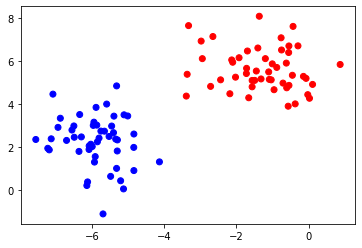

In [2]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [3]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

## Resolvendo o problema 

### Python

In [4]:
D = x.shape[1]
w = [2*random()-1 for i in range(D)]
b = 2*random()-1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum(x_i*w_i for x_i, w_i in zip(x_n, w)) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w  = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print("step {0}: {1}".format(step, cost))
       
print("w:", w)
print("b:", b)

step 0: 0
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.12451691938776843, 0.12257235023188806]
b: 0.03889566974034131


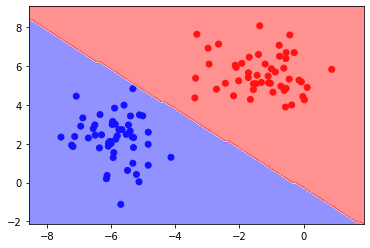

In [5]:
plot_linear_classifier(x, y, w, b)

### Numpy

In [6]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for  x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(x_n, error)
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print("step {0}: {1}".format(step, cost))
       
print("w:", w)
print("b:", b)

step 0: 22
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.11984754 0.30595166]
b: -0.9209205397687223


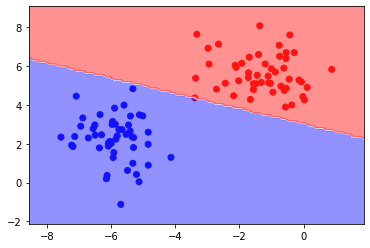

In [7]:
plot_linear_classifier(x, y, w, b)

### Observação:
- Se perceber direitinho esse modelo de perceptron é bem genérico e, por isso, ele vai funcionar para praticamente qualquer caso de classificação, em que que dê para usar o perceptron, é claro.

# Regressão

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Implementando agora o perceptron para classificação em Python, Numpy:

In [8]:
df = pd.read_csv("../data/medidas.csv")
df.head()

,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02


Text(0, 0.5, 'Peso')

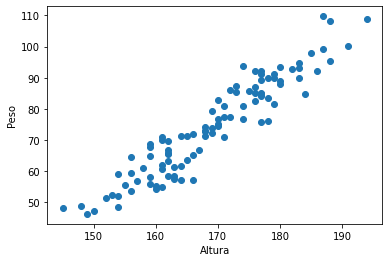

In [9]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [10]:
print(x.shape, y.shape)

(100,) (100,)


Fazendo um reshape dos dados para que eles fiquem com as linhas e as colunas definidas

In [11]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100,)


### python

estimando os learning_rates de **w** e __b__. Elas são diferentes porque nossos dados não estão na mesma escala, a altura em centimentros e os pesos em kilogramas

In [12]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate_w = 1e-7
learning_rate_b = 1e-2

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate_w*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate_b*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 433233.9256838047
step 1000: 6485.968974286616
step 2000: 3295.5094037584695
step 3000: 2739.584685067987
step 4000: 2644.170093139155
step 5000: 2628.410134568457
step 6000: 2626.0723524877435
step 7000: 2625.8442912725955
step 8000: 2625.881187228357
step 9000: 2625.9200216581094
step 10000: 2625.9404305247604
w:  [1.3697506436642242]
b:  -157.87324560056874


### Numpy

In [13]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 35078.43049105822
step 1000: 3882.56073155701
step 2000: 2841.4020410943835
step 3000: 2661.444213537122
step 4000: 2631.176807803424
step 5000: 2626.4440272881025
step 6000: 2625.861257484269
step 7000: 2625.8638279317115
step 8000: 2625.9084261053454
step 9000: 2625.934805367749
step 10000: 2625.947224912459
w:  [1.36985244]
b:  -157.89025026841557


## Pré-processamento com numpy

Como os dados estão em escalas diferentes tivemos que usar 2 learning rate, agora, para usarmos apenas um tempos que color os dados na mesma escala, por isso esse pré-processamento

### observações:
- é sempre bom colocar os dados nas mesma escala.
- vou utilizar o MinMaxScaler do sklearn.preprocessing para o pré processamento.

In [14]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


In [15]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1e-3

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 518352.33124971454
step 100: 3124.376753345595
step 200: 2623.436508958008
step 300: 2611.53562890415
step 400: 2611.251551539505
step 500: 2611.244568648969
step 600: 2611.244366067018
step 700: 2611.2443555864074
step 800: 2611.2443544637767
step 900: 2611.2443543024815
step 1000: 2611.244354277909
w:  [33.60180845]
b:  74.93896426883532


## Exercicio usando o dataset das notas

In [16]:
df = pd.read_csv('../data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

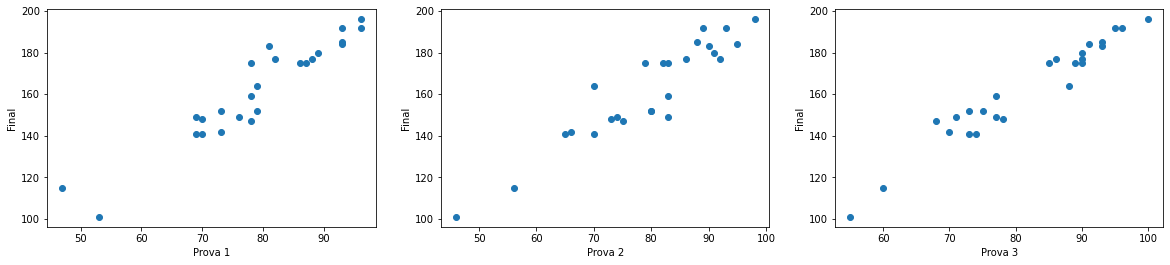

In [17]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [18]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


Normalizando os dados, vou colocar cada valor de nota entre -1 e 1

In [19]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [20]:
D = x.shape[1]
w = [2*random()-1 for i in range(D)]
b = 2*random()-1

learning_rate = 1e-2

for step in range(1501):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum(w_i*x_i for x_i, w_i in zip(x_n, w)) + b
        error =  y_n - y_pred
        w = [w_i + x_i*learning_rate*error for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 506354.7155088869
step 200: 174.1310639789498
step 400: 148.43258013465834
step 600: 146.40985572853066
step 800: 146.18231302483179
step 1000: 146.15441619801962
step 1200: 146.15104761721355
step 1400: 146.15068277753676
w:  [8.730286289448754, 14.136208406084469, 26.318556551044153]
b:  150.71092158333013
